In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.signal import firwin
from scipy.signal import freqz
from scipy.signal import find_peaks_cwt
from scipy.signal import butter, lfilter
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot

%matplotlib inline

ordata = np.genfromtxt("team9_assignment7_sleeping.csv", dtype=float, delimiter=',', names=True)
timestamp = ordata['time']
scaler = preprocessing.MinMaxScaler()
# normazile data
IR = scaler.fit_transform(ordata['IR'])
RED = scaler.fit_transform(ordata['RED'])


# butter filter
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b, a = butter(order, [low, high], btype='band', analog = False)
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def caculateRate(timestamp, data, thres, min_dist, fs):
    peakind = peakutils.indexes(data, thres, min_dist)
    numberOfPeak = len(peakind)
    print "number of peak %d" % numberOfPeak
    rate = np.zeros(numberOfPeak - 1)
    for i in range(1, numberOfPeak):
        interval =  timestamp[peakind[i]]  - timestamp[peakind[i-1]] 
        rate[i-1] =  60 / interval
    return rate

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and wil

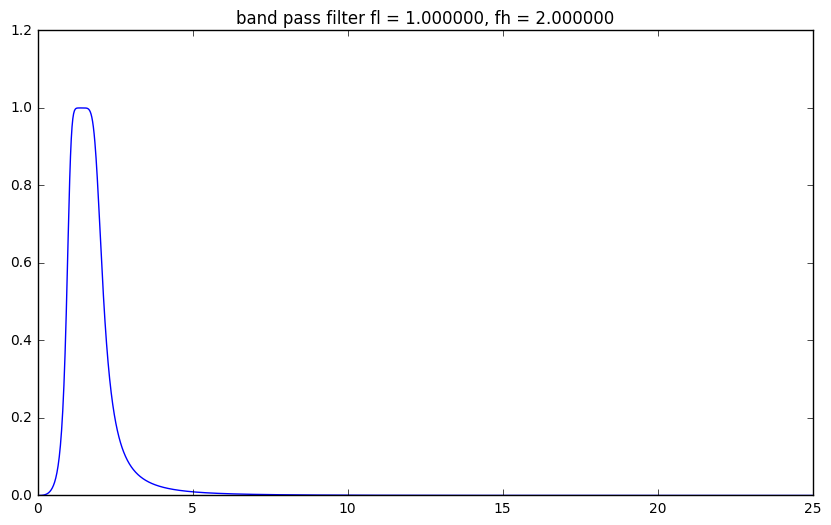

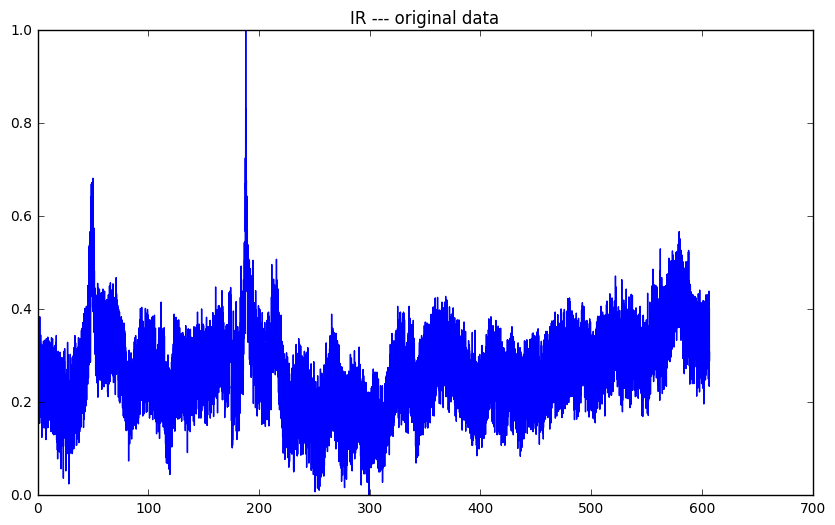

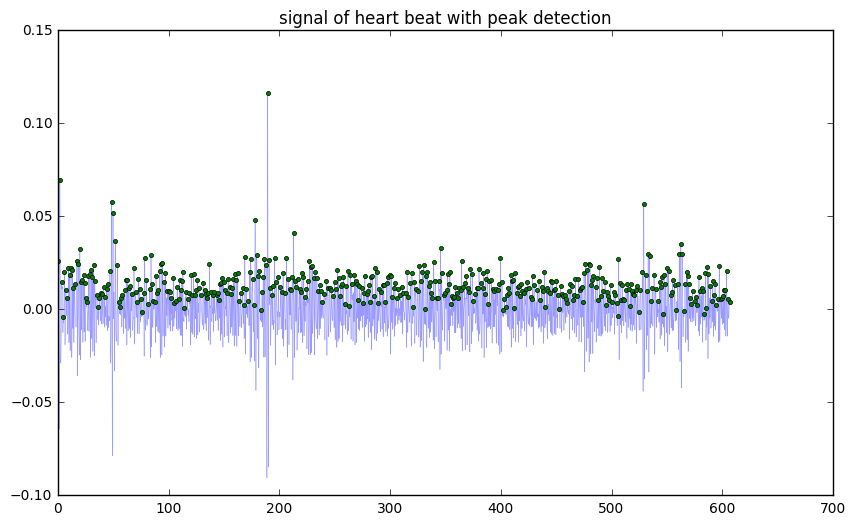

In [2]:
fs = 50.0
lowcut = 1
highcut = 2
order = 3
data = IR
time = timestamp
thres=0.2
min_dist= 20
# lowcut = 1/6.0
# highcut = 1/3.0

# Plot the frequency response for a few different orders.
plt.figure(figsize=(10,6))
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.figure(figsize=(10,6))
plt.plot(time, data)
plt.title("IR --- original data")
pyplot.figure(figsize=(10,6))
heartIndex = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[heartIndex],y[heartIndex], marker="o", ls="", ms=3 )
plt.title("signal of heart beat with peak detection")

[ 46.875       46.875       46.875      ...,  48.38709677  48.38709677
  48.38709677]


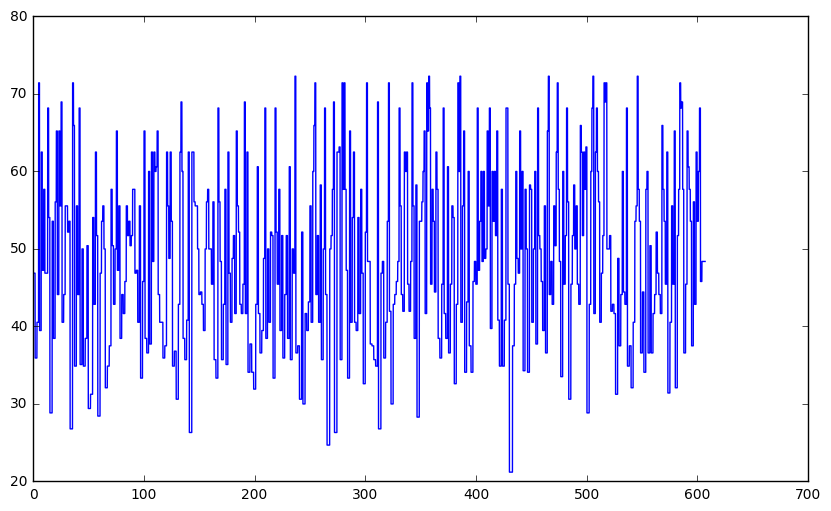

In [48]:
heartRate = caculateRate(time, y, thres,min_dist,fs)
print "the average heart rate is %f"% (np.sum(heartRate)/len(heartRate))


heartBeatArray = np.zeros(len(IR))
count = 1
for i in range(len(heartBeatArray)):
    if i < heartIndex[count] or  count == len(heartRate) - 1 :
        heartBeatArray[i] = heartRate[count - 1]
    else:
        if(count < len(heartRate) - 1):
            count = count + 1
            heartBeatArray[i] = heartRate[count - 1]
print heartBeatArray
plt.figure(figsize=(10,6))
plt.plot(time, heartBeatArray)


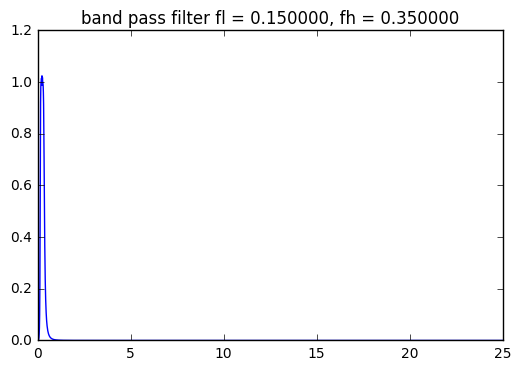

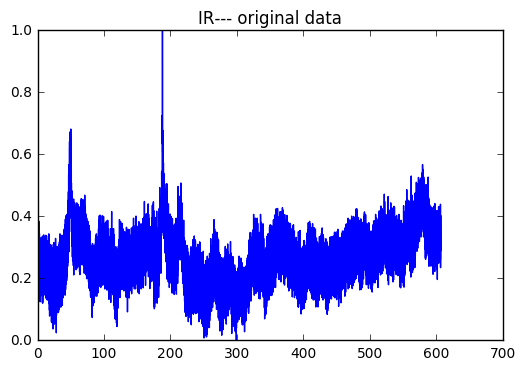

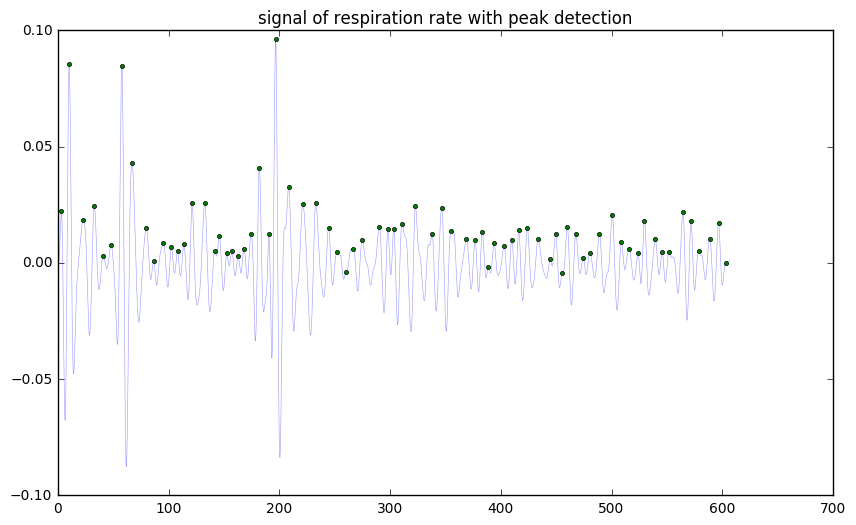

In [6]:
fs = 50.0
lowcut = 0.15
highcut = 0.35
order = 4
data = IR
time = timestamp
thres= 0.01
min_dist = 100
# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.plot(time, data)
plt.title("IR--- original data")
pyplot.figure(figsize=(10,6))
respirationIndex = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[respirationIndex],y[respirationIndex], marker="o", ls="", ms=3 )
plt.title("signal of respiration rate with peak detection")

In [7]:
respirationRate = caculateRate(time, y, thres,min_dist,fs)
# filter abnormal result
result = [x for x in respirationRate if x <= 20 ]
print "the average respiration  rate is %f"% (np.sum(result)/len(result))
print "the real time respiration rate is: \n"
print result

number of peak 74
the average respiration  rate is 7.985795
the real time respiration rate is: 

[8.6330935251798575, 4.694835680751174, 5.9642147117296229, 7.6628352490421401, 8.1632653061224545, 6.2630480167014575, 6.5645514223194743, 4.6224961479198807, 9.1603053435114337, 6.7415730337078719, 8.2987551867219871, 10.889292196007249, 10.362694300518148, 8.1632653061224403, 5.2539404553415121, 6.5934065934065975, 14.457831325301186, 8.9418777943368006, 13.157894736842099, 10.657193605683846, 11.214953271028049, 9.3457943925233415, 8.1190798376184183, 6.8886337543053902, 9.9502487562189028, 5.11073253833049, 4.6547711404189345, 5.11073253833049, 5.2539404553415121, 8.0321285140562253, 7.0257611241217628, 10.084033613445397, 6.9848661233993221, 3.9241334205362928, 7.702182284980724, 11.299435028248583, 8.0753701211306055, 4.9464138499587582, 3.9946737683089264, 6.9284064665127278, 6.9848661233992759, 4.3321299638989279, 7.7821011673151386, 9.104704097116878, 10.889292196007277, 11.741682

[   79   253   573   825  1021  1205  1445  1674  1999  2163  2386  2567
  2705  2850  3034  3320  3548  3652  3820  3934  4075  4209  4370  4555
  4773  4924  5218  5541  5835  6121  6308  6522  6671  6886  7269  7464
  7597  7783  8087  8463  8680  8895  9242  9435  9600  9738  9866 10091
 10266 10423 10618 10863 11133 11258 11413 11521 11716 11882 12033 12249
 12539 12747 12920 13121 13267 13511 13668 13826 14138 14320 14491 14743
 14943 15105]


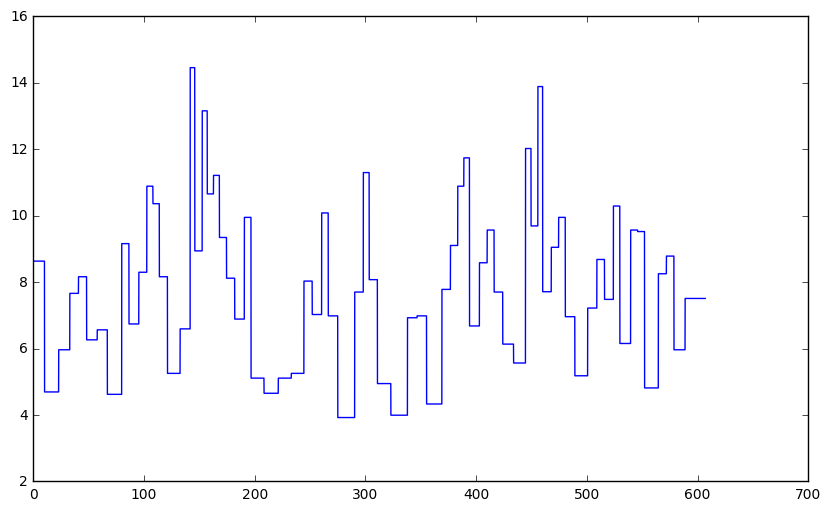

In [8]:
for i in range(len(respirationRate)):
    if respirationRate[i] > 20:
        respirationRate[i] = respirationRate[i - 1]

print respirationIndex
respirationArray = np.zeros(len(IR))
count = 1
for i in range(len(respirationArray)):
    if i < respirationIndex[count] or  count == len(respirationRate) - 1 :
        respirationArray[i] = respirationRate[count - 1]
    else:
        if(count < len(respirationRate) - 1):
            count = count + 1
            respirationArray[i] = respirationRate[count - 1]
plt.figure(figsize=(10,6))
plt.plot(time, respirationArray)

# Calculate SPO2 

## IR signal

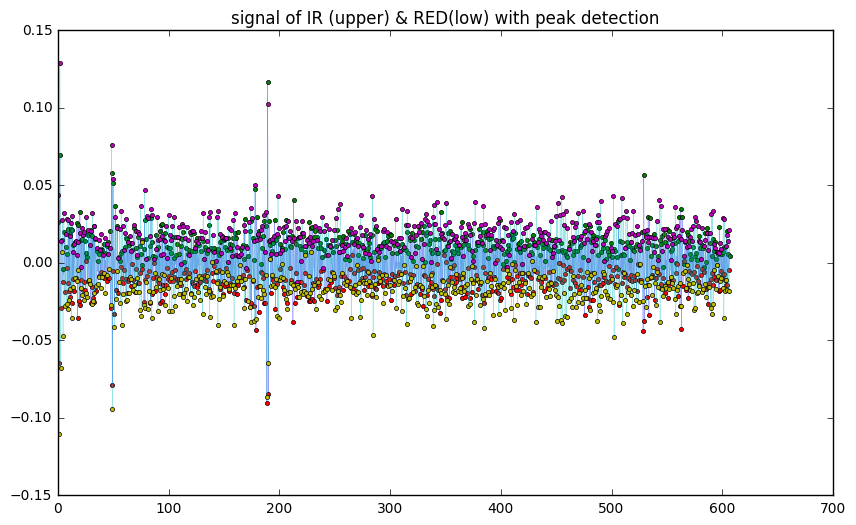

In [18]:
#IROrgin = ordata['IR']
#REDOrgin = ordata['RED']
IROrgin = IR
REDOrgin = RED

fs = 50.0
lowcut = 1
highcut = 2
order = 3

IROrgin = butter_bandpass_filter(IROrgin, lowcut, highcut, fs, order)
REDOrgin = butter_bandpass_filter(REDOrgin, lowcut, highcut, fs, order)
time = timestamp
thres=0.05
min_dist=20
pyplot.figure(figsize=(10,6))
# the index of "postive" peak for IR signal
indexPositiveIR = peakutils.indexes(IROrgin, thres, min_dist)
# the index of "negative" peak for IR signal
indexNegativeIR = peakutils.indexes(-1*IROrgin, thres, min_dist)
# the index of "postive" peak for RED signal
indexPositiveRED = peakutils.indexes(REDOrgin, thres, min_dist)
# the index of "negative" peak for RED signal
indexNegativeRED = peakutils.indexes(-1*REDOrgin, thres, min_dist)
# we find the 15th negative peak will be wrong tagged for "RED" signal
# so we manually remove this point from our indexNegativeRED tuple using following code
indexNegativeRED = list(indexNegativeRED)
del indexNegativeRED[14]
plt.plot(time, IROrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveIR],IROrgin[indexPositiveIR], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeIR],IROrgin[indexNegativeIR], marker="o", ls="", ms=3 )
plt.plot(time, REDOrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveRED],REDOrgin[indexPositiveRED], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeRED],REDOrgin[indexNegativeRED], marker="o", ls="", ms=3 )
plt.title("signal of IR (upper) & RED(low) with peak detection")

In [38]:
def calculateDC(data):
    DC = np.zeros(len(data) - 1) 
    for i in range(len(DC)):
        DC[i] = (data[i + 1] + data[i])/2.0
    return DC

def calculateAC(positive, negative):
#     if len (positive) != len(negative):
#          raise ValueError("the input data should has same dimension")
    minLen = min(len(positive), len(negative))
    AC = np.zeros(minLen - 1)
    for i in range(len(AC)):
        AC[i] = positive[i + 1] - negative[i]
    return AC


ACIR = abs(calculateAC(IROrgin[indexPositiveIR], IROrgin[indexNegativeIR]))
ACRED = abs(calculateAC(REDOrgin[indexPositiveRED], REDOrgin[indexNegativeRED]))

minLen = min(len(ACIR), len(ACRED))
ACIR = ACIR[0:minLen]
ACRED = ACRED[0:minLen]
# DCIR = IROrgin[indexNegativeIR]
# DCRED = REDOrgin[indexNegativeRED]
DCIR = abs(calculateDC(indexNegativeIR))
DCRED = abs(calculateDC(indexNegativeRED))

DCIR = DCIR[0:minLen]
DCRED = DCRED[0:minLen]


ratioAverage = (ACRED * DCIR) * 1.0/(ACIR * DCRED)
spo2 = -45.060*ratioAverage* ratioAverage + 30.354 *ratioAverage + 94.845 

for i in range(len(spo2)):
    if spo2[i] < 90:
        spo2[i] = spo2[i-1] 

count = len(spo2) - 1
while(count >= 0):
    if spo2[count] < 90:
        spo2[count] = spo2[count+1]
    count = count - 1

array([ 99.3775263 ,  99.3775263 ,  99.3775263 ,  99.3775263 ,
        99.3775263 ,  99.3775263 ,  99.3775263 ,  99.3775263 ,
        99.3775263 ,  99.3775263 ,  99.3775263 ,  99.3775263 ,
        99.3775263 ,  99.17254362,  98.96087886,  98.96087886,
        96.28114234,  96.28114234,  96.28114234,  96.28114234,
        96.28114234,  96.28114234,  92.61820281,  92.61820281,
        92.61820281,  93.84848538,  93.44536745,  93.44536745,
        93.44536745,  93.44536745,  93.44536745,  94.05564899,
        94.05564899,  94.05564899,  94.05564899,  94.05564899,
        94.05564899,  94.05564899,  99.29086562,  99.29086562,
        99.29086562,  99.29086562,  99.29086562,  99.29086562,
        99.29086562,  99.29086562,  99.29086562,  99.29086562,
        99.29086562,  99.29086562,  99.29086562,  99.29086562,
        99.29086562,  99.29086562,  99.20472755,  99.20472755,
        99.20472755,  99.20472755,  99.20472755,  98.57958702,
        98.57958702,  98.57958702,  98.57958702,  98.57

95.4895536278


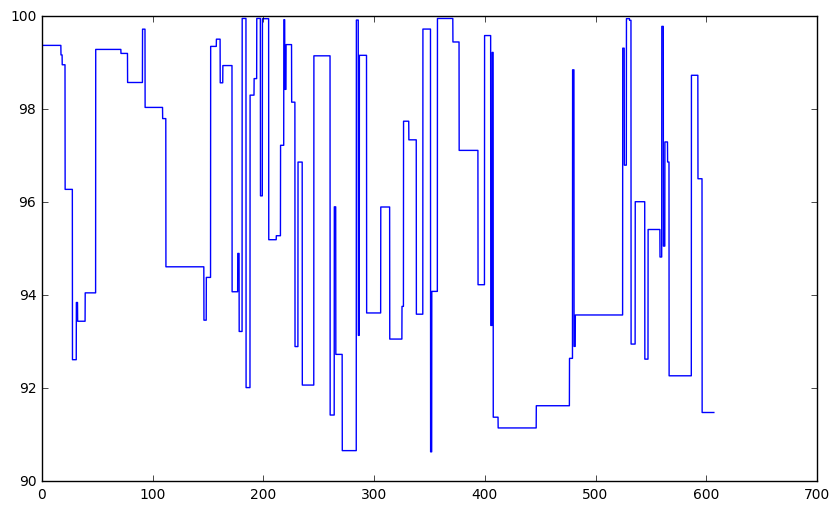

In [46]:
spo2Array = np.zeros(len(IR))
count = 1
for i in range(len(spo2Array)):
    if i < indexPositiveIR[count] or  count == len(spo2) - 1 :
        spo2Array[i] = spo2[count - 1]
    else:
        if(count < len(spo2) - 1):
            count = count + 1
            spo2Array[i] = spo2[count - 1]
plt.figure(figsize=(10,6))
plt.plot(time, spo2Array)
print sum(spo2Array)/len(spo2Array)

In [40]:
saveData = np.zeros((len(IR), 8))

ir = ordata['IR']
red = ordata['RED']
x = ordata["X"]
y = ordata["Y"]
z = ordata["Z"]

for i in range(len(IR)):
    saveData[i, 0] = ir[i]
    saveData[i, 1] = red[i]
    saveData[i, 2] = x[i]
    saveData[i, 3] = y[i]    
    saveData[i, 4] = z[i]
    saveData[i, 5] = heartBeatArray[i]
    saveData[i, 6] = respirationArray[i]
    saveData[i, 7] = spo2Array[i]

In [41]:
np.savetxt("team9_assignment7_sleeping.csv", saveData, fmt='%.3f', header="IR, RED, X, Y, Z, Heart Rate, Resoiration Rate, SPO2", delimiter=',')

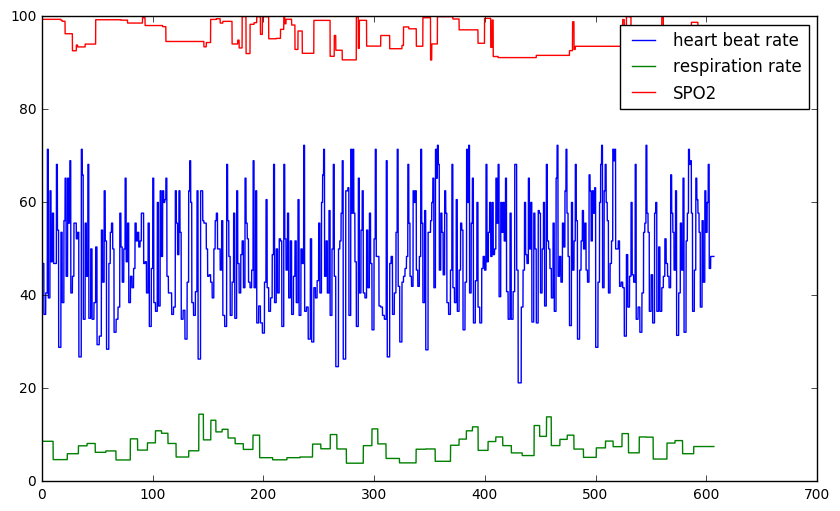

In [42]:
plt.figure(figsize=(10,6))
plt.plot(time, heartBeatArray, label='heart beat rate')
plt.plot(time, respirationArray, label = "respiration rate")
plt.plot(time, spo2Array, label = "SPO2")
plt.legend()

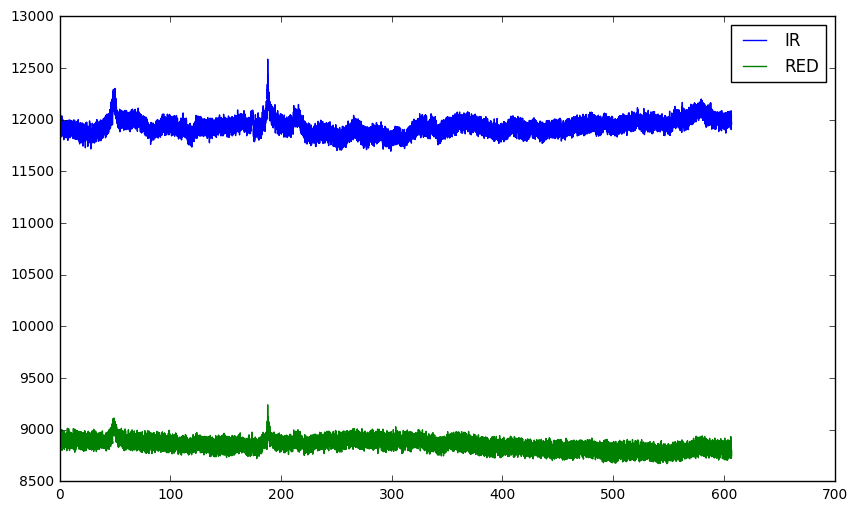

In [43]:
plt.figure(figsize=(10,6))
plt.plot(time, ir, label = "IR")
plt.plot(time, red, label = "RED")
plt.legend()

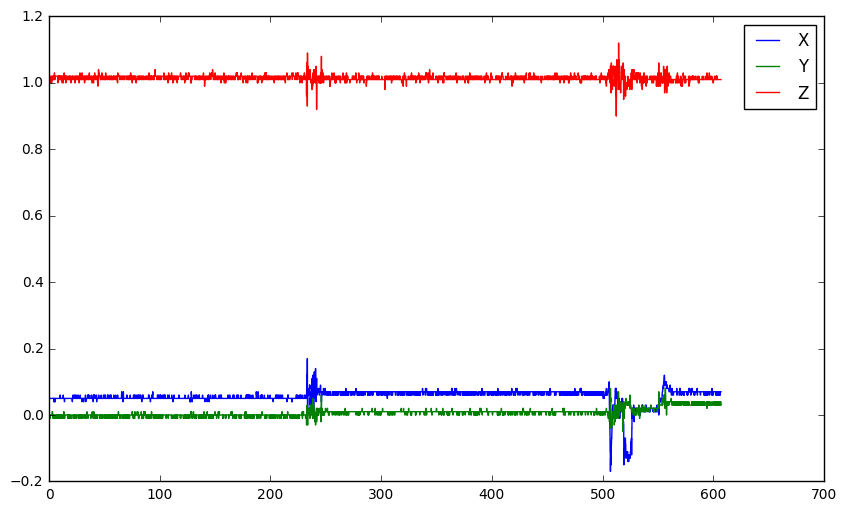

In [45]:
plt.figure(figsize=(10,6))
plt.plot(time, x, label = "X")
plt.plot(time, y, label = "Y")
plt.plot(time, z, label = "Z")

plt.legend()